<h1>Serie de tiempo mensual</h1>

Importamos las librerías

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Tomamos nuestros datos

In [6]:
ds_currents = xr.open_dataset('..\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc')
ds_monthly = ds_currents.groupby('time.month').mean()
data_oni = pd.read_csv('..\Data\ONI_NOAA.txt', sep="\s+")


Tomamos las variables

In [7]:
V = ds_monthly["vo"].mean(dim=["depth"])
U = ds_monthly["uo"].mean(dim=["depth"])
date = ds_monthly["month"].to_numpy()
velocity = np.sqrt(U**2 + V**2)

Reconocemos los puntos dentro de los datos por medio de las coordenadas

In [8]:
P1 = velocity.sel(latitude = 17.25 , longitude = -74, method="nearest").to_numpy()
P2 = velocity.sel(latitude = 13 , longitude = -73, method="nearest").to_numpy()
P3 = velocity.sel(latitude = 10 , longitude = -77, method="nearest").to_numpy()
P4 = velocity.sel(latitude = 14 , longitude = -80, method="nearest").to_numpy()


Tomamos el valor de la anomalía

In [9]:
anomalia = data_oni["ANOM"]

Generamos un DataFrame con los datos

In [10]:
points_df = pd.DataFrame(list(zip(P1, P2, P3, P4)), columns=["Punto 1", "Punto 2", "Punto 3", "Punto 4"], index = date)


Graficamos la serie de tiempo mensual

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

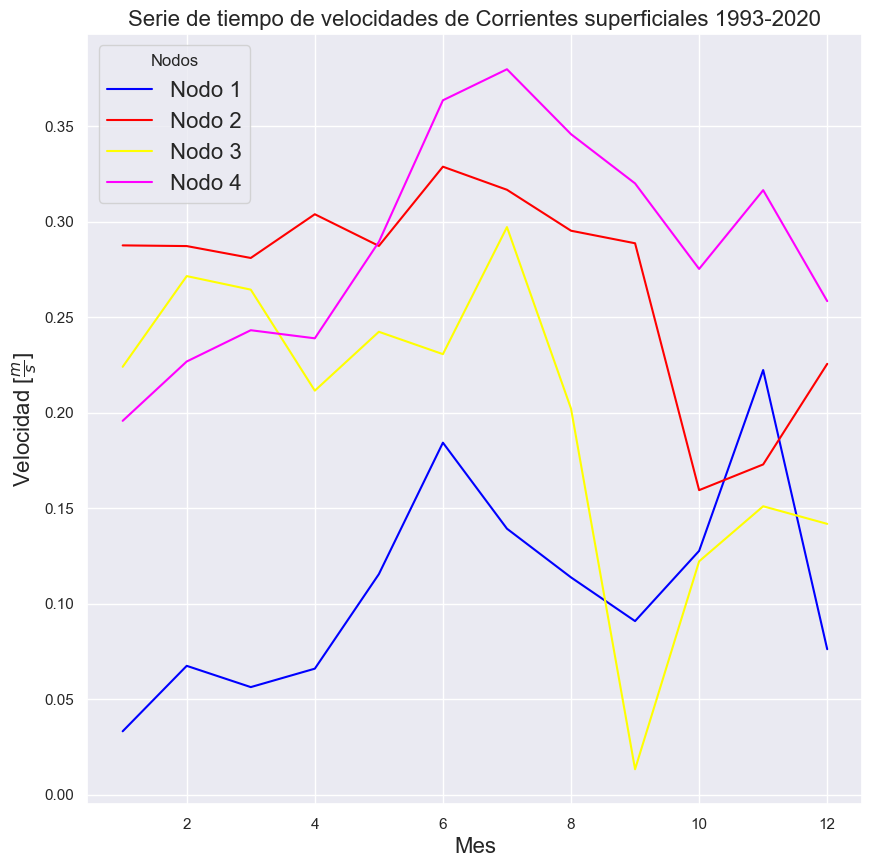

In [11]:
plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
sns.lineplot(data = points_df["Punto 1"], color= "blue", label="Nodo 1")
sns.lineplot(data = points_df["Punto 2"], color= "red", label="Nodo 2")
sns.lineplot(data = points_df["Punto 3"], color= "yellow", label="Nodo 3")
sns.lineplot(data = points_df["Punto 4"], color= "magenta", label="Nodo 4")
plt.xlabel("Mes", fontsize=16)
plt.ylabel(r"Velocidad [$\frac{m}{s}$]", fontsize=16)
plt.title("Serie de tiempo de velocidades de Corrientes superficiales 1993-2020", fontsize=16)
plt.legend(title="Nodos", fontsize=16)